In [9]:
import requests
import json
import zipfile
import io
import pandas as pd
from scipy.io import arff
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
url = "http://www.timeseriesclassification.com/Downloads/OliveOil.zip"

In [10]:
def get_dataset(url):
    # download the dataset
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
def read_ts_file(filename):
    df = pd.read_csv(filename,skiprows=20, header=None)
    class_labels = df.iloc[0, 1:].values
    df = df.apply(pd.to_numeric, errors='coerce')
    # Set the column names
    df.columns = ['ts_' + str(i) for i in range(1, df.shape[1]+1)]
    return df
df = read_ts_file("OliveOil_TRAIN.ts")
df.head()



,ts_1,ts_2,ts_3,ts_4,ts_5,ts_6,ts_7,ts_8,ts_9,ts_10,...,ts_561,ts_562,ts_563,ts_564,ts_565,ts_566,ts_567,ts_568,ts_569,ts_570
0,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,-0.559907,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,NaN
1,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,-0.556093,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,NaN
2,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,-0.566727,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,NaN
3,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,-0.568411,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,NaN
4,-0.600229,-0.599577,-0.596144,-0.590664,-0.583358,-0.574398,-0.565483,-0.557200,-0.549211,-0.543827,...,-0.986319,-0.987329,-0.987618,-0.988062,-0.988807,-0.989265,-0.989560,-0.989695,-0.990430,NaN


In [11]:
# Load ARFF file
data = arff.loadarff('OliveOil_TRAIN.arff')

# Convert to DataFrame
df = pd.DataFrame(data[0])

# Display the first few rows
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att562,att563,att564,att565,att566,att567,att568,att569,att570,target
0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,-0.557407,...,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120,b'1'
1,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,-0.559907,...,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549,b'1'
2,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,-0.556093,...,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858,b'1'
3,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,-0.566727,...,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614,b'1'
4,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,-0.568411,...,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331,b'1'


In [12]:
# Load ARFF file
data = arff.loadarff('OliveOil_TEST.arff')

# Convert to DataFrame
df_test = pd.DataFrame(data[0])


df_test


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att562,att563,att564,att565,att566,att567,att568,att569,att570,target
0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,-0.564274,...,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377,b'1'
1,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,-0.563845,...,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858,b'1'
2,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,-0.561432,...,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089,b'1'
3,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,-0.557242,...,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385,b'1'
4,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,-0.559617,...,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584,b'1'
5,-0.618782,-0.617716,-0.613997,-0.608234,-0.601079,-0.593254,-0.585160,-0.577374,-0.569800,-0.563630,...,-0.974664,-0.974808,-0.975386,-0.975538,-0.976176,-0.977076,-0.977115,-0.977705,-0.978321,b'2'
6,-0.618084,-0.615795,-0.611206,-0.605597,-0.598689,-0.591469,-0.583601,-0.574438,-0.567063,-0.561506,...,-0.975553,-0.975290,-0.975443,-0.976166,-0.977054,-0.977661,-0.977825,-0.977879,-0.978005,b'2'
7,-0.611166,-0.610133,-0.606317,-0.600795,-0.593912,-0.585110,-0.576604,-0.569136,-0.562062,-0.555740,...,-0.981895,-0.982864,-0.983285,-0.983986,-0.985206,-0.985308,-0.985060,-0.985320,-0.986107,b'2'
8,-0.611302,-0.610611,-0.607795,-0.601815,-0.594525,-0.586312,-0.577069,-0.568377,-0.561396,-0.555672,...,-0.978070,-0.978492,-0.979135,-0.980142,-0.981493,-0.982160,-0.981877,-0.981701,-0.982029,b'2'
9,-0.622387,-0.621123,-0.617521,-0.612813,-0.606186,-0.598040,-0.590471,-0.582751,-0.574777,-0.568147,...,-0.978230,-0.978459,-0.978754,-0.979418,-0.980146,-0.980762,-0.981045,-0.981799,-0.982103,b'2'


AxesSubplot(0.125,0.125;0.775x0.755)


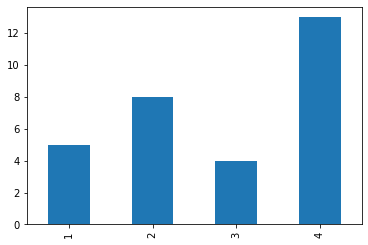

In [18]:
df['target'] = df['target'].apply(lambda x: x.decode('utf-8').replace('b', ''))

df_test['target'] = df_test['target'].apply(lambda x: x.decode('utf-8').replace('b', ''))

print( df['target'].value_counts().sort_index().plot(kind='bar'))


In [19]:
X_train = df.drop('target', axis=1)
y_train = df['target']

X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

KNN

In [20]:
# Import KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)


c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8
Precision: 0.8376623376623377
Recall: 0.7430555555555556
F1-score: 0.7257246376811594


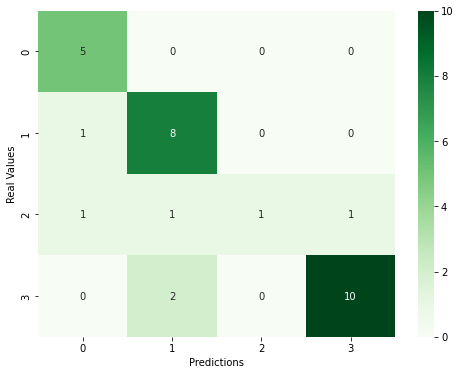

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

Decision tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)



Accuracy: 0.9
Precision: 0.9365384615384615
Recall: 0.8541666666666666
F1-score: 0.8735087719298246


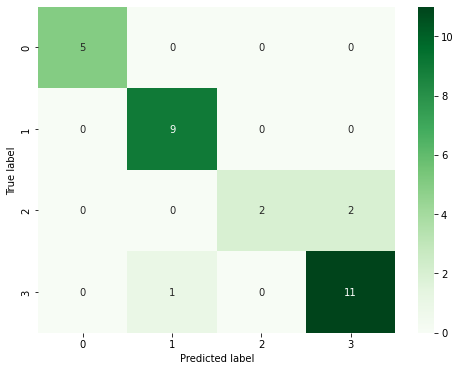

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Linear discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict on the test data
y_pred = lda.predict(X_test)


Accuracy: 0.9
Precision: 0.9365384615384615
Recall: 0.8541666666666666
F1-score: 0.8735087719298246


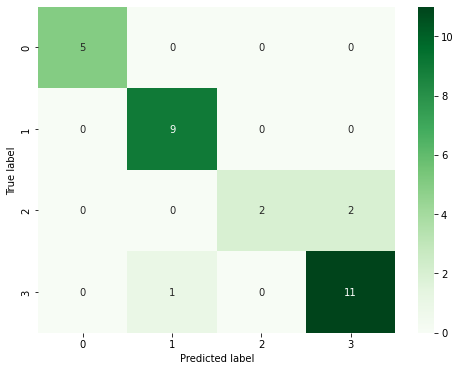

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train a Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

SVM

c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'C': 10, 'kernel': 'linear'}
Mean cross-validation score:  0.8333333333333334
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.60      1.00      0.75         9
           3       1.00      0.25      0.40         4
           4       0.92      0.92      0.92        12

    accuracy                           0.77        30
   macro avg       0.88      0.64      0.66        30
weighted avg       0.85      0.77      0.74        30



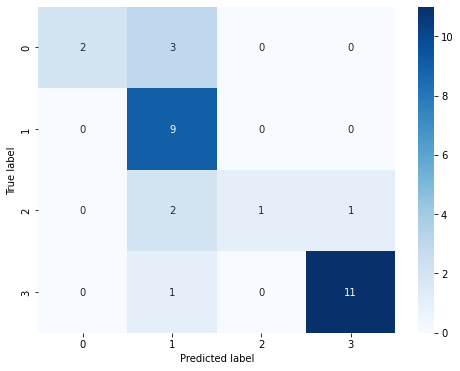

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# define the SVM classifier
svm_clf = svm.SVC()

# define the parameter grid for hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Mean cross-validation score: ", grid_search.best_score_)

# predict on the test set using the best model
y_pred = grid_search.predict(X_test)

print("Classification report: \n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")

Accuracy: 0.7666666666666667
Precision: 0.8791666666666667
Recall: 0.6416666666666666
F1-score: 0.6595238095238095


ANN

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.utils import np_utils

# convert target variable to one-hot encoding
y_train_ann = np_utils.to_categorical(y_train)[:, -4:]
y_test_ann = np_utils.to_categorical(y_test)[:, -4:]

# define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=570, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train, y_train_ann, epochs=100, batch_size=5, verbose=1)

# evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test_ann, verbose=0)
print('Accuracy: ',(accuracy))

ModuleNotFoundError: No module named 'tensorflow'

In [29]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_test_ann)
print(y_train_ann)

NameError: name 'model' is not defined